# Simulate an FMU in different modes
Tutorial by Johannes Stoljar, Tobias Thummerer

🚧 This tutorial is under revision and will be replaced by an up-to-date version soon 🚧

## License

In [1]:
# Copyright (c) 2021 Tobias Thummerer, Lars Mikelsons, Josef Kircher, Johannes Stoljar
# Licensed under the MIT license. 
# See LICENSE (https://github.com/thummeto/FMI.jl/blob/main/LICENSE) file in the project root for details.

## Motivation
This Julia Package *FMI.jl* is motivated by the use of simulation models in Julia. Here the FMI specification is implemented. FMI (*Functional Mock-up Interface*) is a free standard ([fmi-standard.org](https://fmi-standard.org/)) that defines a container and an interface to exchange dynamic models using a combination of XML files, binaries and C code zipped into a single file. The user can thus use simulation models in the form of an FMU (*Functional Mock-up Units*). Besides loading the FMU, the user can also set values for parameters and states and simulate the FMU both as co-simulation and model exchange simulation.

## Introduction to the example
In this example we want to show how fast and easy the simulation for an FMU is. For this purpose, the FMU is simulated in co-simulation mode and in model-exchange mode. After the FMU has been simulated, the simulation results are displayed in a graph. The graphs of the different modes are compared with each other. The used model is a one-dimensional spring pendulum with friction. The object-orientated structure of the *SpringFrictionPendulum1D* can be seen in the following graphic.

![svg](https://github.com/thummeto/FMI.jl/blob/main/docs/src/examples/pics/SpringFrictionPendulum1D.svg?raw=true)  


## Target group
The example is primarily intended for users who work in the field of simulations. The example wants to show how simple it is to use FMUs in Julia.


## Other formats
Besides, this [Jupyter Notebook](https://github.com/thummeto/FMI.jl/blob/examples/examples/src/simulate.ipynb) there is also a [Julia file](https://github.com/thummeto/FMI.jl/blob/examples/examples/src/simulate.jl) with the same name, which contains only the code cells and for the documentation there is a [Markdown file](https://github.com/thummeto/FMI.jl/blob/examples/examples/src/simulate.md) corresponding to the notebook.  


## Getting started

### Installation prerequisites
|     | Description                       | Command                   | Alternative                                    |   
|:----|:----------------------------------|:--------------------------|:-----------------------------------------------|
| 1.  | Enter Package Manager via         | ]                         |                                                |
| 2.  | Install FMI via                   | add FMI                   | add " https://github.com/ThummeTo/FMI.jl "     |
| 3.  | Install FMIZoo via                | add FMIZoo                | add " https://github.com/ThummeTo/FMIZoo.jl "  |
| 4.  | Install Plots via                 | add Plots                 |                                                |

## Code section

To run the example, the previously installed packages must be included. 

In [2]:
# imports
using FMI
using FMIZoo
using Plots
using DifferentialEquations

### Simulation setup

Next, the start time and end time of the simulation are set. Finally, a step size is specified to store the results of the simulation at these time steps.

In [3]:
tStart = 0.0
tStep = 0.01
tStop = 8.0
tSave = tStart:tStep:tStop

0.0:0.01:8.0

### Import FMU

In the next lines of code the FMU model from *FMIZoo.jl* is loaded and the information about the FMU is shown.

In [4]:
# we use an FMU from the FMIZoo.jl
pathToFMU = get_model_filename("SpringFrictionPendulum1D", "Dymola", "2022x")

myFMU = loadFMU(pathToFMU)
# loadFMU("path/to/myFMU.fmu"; unpackPath = "path/to/unpacked/fmu/")

info(myFMU)

#################### Begin information for FMU ####################
	Model name:			SpringFrictionPendulum1D
	FMI-Version:			2.0
	GUID:				{2e178ad3-5e9b-48ec-a7b2-baa5669efc0c}
	Generation tool:		Dymola Version 2022x (64-bit), 2021-10-08
	Generation time:		2022-05-19T06:54:12Z
	Var. naming conv.:		structured
	Event indicators:		24
	Inputs:				0
	Outputs:			0
	States:				2


		33554432 ["mass.s"]
		33554433 ["mass.v", "mass.v_relfric"]
	Parameters:			12
		16777216 ["fricScale"]
		16777217 ["s0"]
		16777218 ["v0"]
		16777219 ["fixed.s0"]
		...
		16777223 ["mass.smin"]
		16777224 ["mass.v_small"]
		16777225 ["mass.L"]
		16777226 ["mass.m"]
		16777227 ["mass.fexp"]
	Supports Co-Simulation:		true
		Model identifier:	SpringFrictionPendulum1D
		Get/Set State:		true
		Serialize State:	true
		Dir. Derivatives:	true
		Var. com. steps:	true
		Input interpol.:	true
		Max order out. der.:	1
	Supports Model-Exchange:	true
		Model identifier:	SpringFrictionPendulum1D
		Get/Set State:		true
		Serialize State:	true
		Dir. Derivatives:	true
##################### End information for FMU #####################


### Simulate FMU

In the following, the FMU is simulated in the two different simulation modes.

#### Simulate as Co-Simulation

In the next steps the recorded values are defined. The first state is the position of the mass and the second state is the velocity. In the function `simulateCS()` the FMU is simulated in co-simulation mode (CS) with an adaptive step size but with fixed save points `tSave`. In addition, the start and end time and the recorded variables are specified.

In [5]:
vrs = ["mass.s", "mass.v"]

dataCS = simulateCS(myFMU, (tStart, tStop); recordValues=vrs, saveat=tSave)

Model name:
	SpringFrictionPendulum1D
Success:
	true
f(x)-Evaluations:
	In-place: 0
	Out-of-place: 0
Jacobian-Evaluations:
	∂ẋ_∂p: 0
	∂ẋ_∂x: 0
	∂ẋ_∂u: 0
	∂y_∂p: 0
	∂y_∂x: 0
	∂y_∂u: 0
	∂e_∂p: 0
	∂e_∂x: 0
	∂e_∂u: 0
	∂xr_∂xl: 0
Gradient-Evaluations:
	∂ẋ_∂t: 0
	∂y_∂t: 0
	∂e_∂t: 0
Callback-Evaluations:
	Condition (event-indicators): 0
	Time-Choice (event-instances): 0
	Affect (event-handling): 0
	Save values: 0
	Steps completed: 0
Values [801]:
	0.0	(0.5, 0.0)
	0.01	(0.5002235448486548, 0.042692491939260585)
	0.02	(0.5008715291319449, 0.08568000508550636)
	0.03	(0.5019478597521578, 0.12892136998736314)
	0.04	(0.5034570452098334, 0.17232325681284336)
	0.05	(0.5053993458877354, 0.2158440857658765)
	0.06	(0.5077764240578201, 0.259420181133082)
	0.07	(0.5105886522837868, 0.30295578207463486)
	0.08	(0.5138351439717114, 0.3464184707972189)
	...
	8.0	(1.0713672543616686, -1.0008145180651074e-10)
Events [0]:


#### Simulate as Model-Exchange

In the function `simulateME()` the FMU is simulated in model-exchange mode (ME) with an adaptive step size but with fixed save points `tSave`. In addition, the start and end time are specified. In contrast to the co-simulation, the values to be stored are not specified here, since the states and events of the FMU are always output as well. The identifiers given above just correspond to the states of the FMU.

In [6]:
dataME = simulateME(myFMU, (tStart, tStop); saveat=tSave)

Simulating ME-FMU ...   0%|█                             |  ETA: N/A

Simulating ME-FMU ... 100%|██████████████████████████████| Time: 0:00:10


Model name:
	SpringFrictionPendulum1D
Success:
	true
f(x)-Evaluations:
	In-place: 687
	Out-of-place: 0
Jacobian-Evaluations:
	∂ẋ_∂p: 0
	∂ẋ_∂x: 0
	∂ẋ_∂u: 0
	∂y_∂p: 0
	∂y_∂x: 0
	∂y_∂u: 0
	∂e_∂p: 0
	∂e_∂x: 0
	∂e_∂u: 0
	∂xr_∂xl: 0
Gradient-Evaluations:
	∂ẋ_∂t: 0
	∂y_∂t: 0
	∂e_∂t: 0
Callback-Evaluations:
	Condition (event-indicators): 1451
	Time-Choice (event-instances): 0
	Affect (event-handling): 6
	Save values: 0
	Steps completed: 108
States [801]:
	0.0	[0.5, 0.0]
	0.01	[0.5002131418271644, 0.042689450728413396]
	0.02	[0.500854887495059, 0.08570846016824456]
	0.03	[0.5019281657516875, 0.12898390148079517]
	0.04	[0.5034351795370763, 0.1724439361472896]
	0.05	[0.5053774247453302, 0.21601821086567022]
	0.06	[0.5077556992635474, 0.25963791323182644]
	0.07	[0.510570115246666, 0.30323585206399734]
	0.08	[0.5138201143130435, 0.34674645493266887]
	...
	8.0	[1.0668392065867367, -1.0000102440003257e-10]
Events [6]:
	State-Event #11 @ 2.352941176471972e-11s (state-change: false)
	State-Event #1

### Plotting FMU

After the simulation is finished the results of the FMU for the co-simulation and model-exchange mode can be plotted. In the plot for the FMU it can be seen that the oscillation continues to decrease due to the effect of the friction. If you simulate long enough, the oscillation comes to a standstill in a certain time.

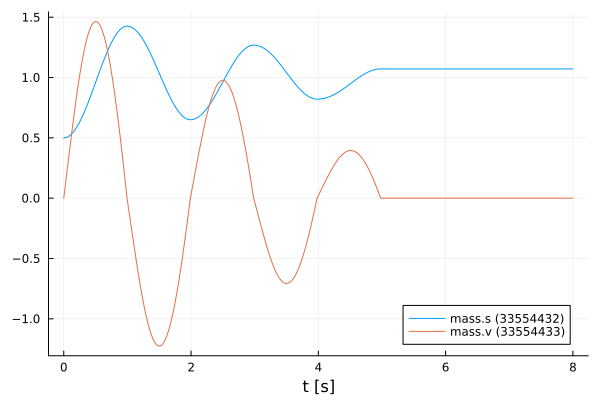

In [7]:
plot(dataCS)

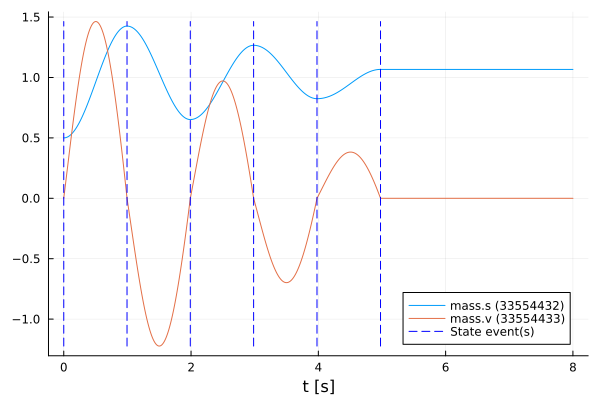

In [8]:
plot(dataME)

From both graphs it can be seen that the simulation calculates exactly the same results.

### Unload FMU

After plotting the data, the FMU is unloaded and all unpacked data on disc is removed.

In [9]:
unloadFMU(myFMU)

### Summary

Based on this tutorial it can be seen that simulating in the different mode is very easy, and it only takes a few commands to simulate the FMU. 